## Welcome to my WHR 2024 exploration.
### Introduction (1 minute)

Hi I am Olav and I work at Variant. We're hiring!

Here we will pick apart and get a deep dive on the report, having a clear question(s) on what to look for and get answered, finding correlations, driving trends, relationships, distributions and so on. We will focus on visualizations, tests, getting a better understanding of this topic through data science.

There will be a lot of tinkering about, but that is ok!


It's by Gallup World Poll. Released yearly. They have a yearly focus, and this year it's age. We won't discuss that today, but if you're interested, go check them out. We'll focus on the general geport, if anyone hasn't heard of it that should be a good start.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
orig_df = pd.read_excel("/home/olav/dev/python/practical-statistics-for-data-scientists/data/DataForTable2.1.xls")
orig_df = orig_df.rename(columns={"Life Ladder": "ll"})

In [ ]:
orig_df.replace("Congo (Brazzaville)", "DR Congo", inplace=True)
orig_df.replace("Congo (Kinshasa)", "DR Congo", inplace=True)
orig_df.replace("Czechia", "Czech Republic", inplace=True)
orig_df.replace("Hong Kong S.A.R. of China", "Hong Kong", inplace=True)

In [ ]:
countries = [
  {
    "country": "India",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "China",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "United States",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Indonesia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Pakistan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Nigeria",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Brazil",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Bangladesh",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Russia",
    "continent": [
      "Asia",
      "Europe"
    ],
    "unMember": True
  },
  {
    "country": "Ethiopia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Mexico",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Japan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Egypt",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Philippines",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "DR Congo",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Vietnam",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Iran",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Turkey",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Germany",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Thailand",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "United Kingdom",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Tanzania",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "France",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "South Africa",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Italy",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Kenya",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Myanmar",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Colombia",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "South Korea",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Sudan",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Uganda",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Spain",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Algeria",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Iraq",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Argentina",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Afghanistan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Yemen",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Canada",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Poland",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Morocco",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Angola",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Ukraine",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Uzbekistan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Malaysia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Mozambique",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Ghana",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Peru",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Saudi Arabia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Madagascar",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Ivory Coast",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Nepal",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Cameroon",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Venezuela",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Niger",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Australia",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "North Korea",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Syria",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Mali",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Burkina Faso",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Taiwan",
    "continent": "Asia",
    "unMember": False
  },
  {
    "country": "Sri Lanka",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Malawi",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Zambia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Kazakhstan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Chad",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Chile",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Romania",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Somalia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Senegal",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Guatemala",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Netherlands",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Ecuador",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Cambodia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Zimbabwe",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Guinea",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Benin",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Rwanda",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Burundi",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Bolivia",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Tunisia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "South Sudan",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Haiti",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Belgium",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Jordan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Dominican Republic",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "United Arab Emirates",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Cuba",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Honduras",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Czech Republic",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Sweden",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Tajikistan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Papua New Guinea",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Portugal",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Azerbaijan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Greece",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Hungary",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Togo",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Israel",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Austria",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Belarus",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Switzerland",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Sierra Leone",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Laos",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Turkmenistan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Hong Kong",
    "continent": "Asia",
    "unMember": False
  },
  {
    "country": "Libya",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Kyrgyzstan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Paraguay",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Nicaragua",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Bulgaria",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Serbia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "El Salvador",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Republic of the Congo",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Denmark",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Singapore",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Lebanon",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Finland",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Liberia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Norway",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Slovakia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Palestine",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Central African Republic",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Oman",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Ireland",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "New Zealand",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Mauritania",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Costa Rica",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Kuwait",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Panama",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Croatia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Georgia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Eritrea",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Mongolia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Uruguay",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Puerto Rico",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Bosnia and Herzegovina",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Qatar",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Moldova",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Namibia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Armenia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Lithuania",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Jamaica",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Albania",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Gambia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Gabon",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Botswana",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Lesotho",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Guinea-Bissau",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Slovenia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Equatorial Guinea",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Latvia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "North Macedonia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Bahrain",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Trinidad and Tobago",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Timor-Leste",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Estonia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Cyprus",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Mauritius",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Eswatini",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Djibouti",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Fiji",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Reunion",
    "continent": "Africa",
    "unMember": False
  },
  {
    "country": "Comoros",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Guyana",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Solomon Islands",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Bhutan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Macau",
    "continent": "Asia",
    "unMember": False
  },
  {
    "country": "Luxembourg",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Montenegro",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Suriname",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Western Sahara",
    "continent": "Africa",
    "unMember": False
  },
  {
    "country": "Malta",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Maldives",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Cape Verde",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Brunei",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Belize",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Bahamas",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Iceland",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Guadeloupe",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Martinique",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Vanuatu",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Mayotte",
    "continent": "Africa",
    "unMember": False
  },
  {
    "country": "French Guiana",
    "continent": "South America",
    "unMember": False
  },
  {
    "country": "New Caledonia",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Barbados",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "French Polynesia",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Sao Tome and Principe",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Samoa",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Curacao",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Saint Lucia",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Guam",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Kiribati",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Seychelles",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Grenada",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Micronesia",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Aruba",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Tonga",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Jersey",
    "continent": "Europe",
    "unMember": False
  },
  {
    "country": "Saint Vincent and the Grenadines",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Antigua and Barbuda",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "United States Virgin Islands",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Isle of Man",
    "continent": "Europe",
    "unMember": False
  },
  {
    "country": "Andorra",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Cayman Islands",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Dominica",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Bermuda",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Guernsey",
    "continent": "Europe",
    "unMember": False
  },
  {
    "country": "Greenland",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Faroe Islands",
    "continent": "Europe",
    "unMember": False
  },
  {
    "country": "Saint Kitts and Nevis",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "American Samoa",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Turks and Caicos Islands",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Northern Mariana Islands",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Sint Maarten",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Liechtenstein",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "British Virgin Islands",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Gibraltar",
    "continent": "Europe",
    "unMember": False
  },
  {
    "country": "Monaco",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Marshall Islands",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "San Marino",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Saint Martin",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Palau",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Anguilla",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Cook Islands",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Nauru",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Wallis and Futuna",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Saint Barthelemy",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Tuvalu",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Saint Pierre and Miquelon",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Montserrat",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Falkland Islands",
    "continent": "South America",
    "unMember": False
  },
  {
    "country": "Tokelau",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Niue",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Vatican City",
    "continent": "Europe",
    "unMember": True
  }
]

In [ ]:
continent_dict = {}
for d in countries:
    country = d["country"]
    continents = d["continent"]
    if type(continents) == list:
        continent_dict[country] = continents[0]
    else:
        continent_dict[country] = continents


In [ ]:
continent_dict["Kosovo"] = {
    "continent": "Europe"
}
continent_dict["Somaliland region"] = {
    "continent": "Africa"
}

continent_dict["State of Palestine"] = {
    "continent": "Asia"
}

continent_dict["Taiwan Province of China"] = {
    "continent": "Asia"
}

continent_dict["Türkiye"] = {
    "continent": "Asia"
}



In [ ]:
# To work with something easier to write!
df = orig_df.copy(deep=True)

In [ ]:
df["continent"] = df.apply(lambda row: continent_dict[row["Country name"]], axis=1)

In [ ]:
df["Country name"] = df["Country name"].astype("string")
df["continent"] = df["continent"].astype("string")

In [ ]:
continent_df = df.iloc[:, 1:].groupby("continent").mean().reset_index()

# Section 1: What Does the Report Measure? (2 minutes)


* Discuss the key metrics used in the WHR: GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

* Emphasize that happiness is multidimensional—it isn't just about wealth but also includes social relationships and trust within society.

* Provide an example: countries with similar GDP levels can have vastly different happiness scores due to differences in social support.

### The WHR asks the question

«Please imagine a ladder with steps numbered from zero at the bottom to 10 at the top.
The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you.
On which step of the ladder would you say you personally feel you stand at this time?


Answers to the first question end up in the *Life Ladder* (LL) column.



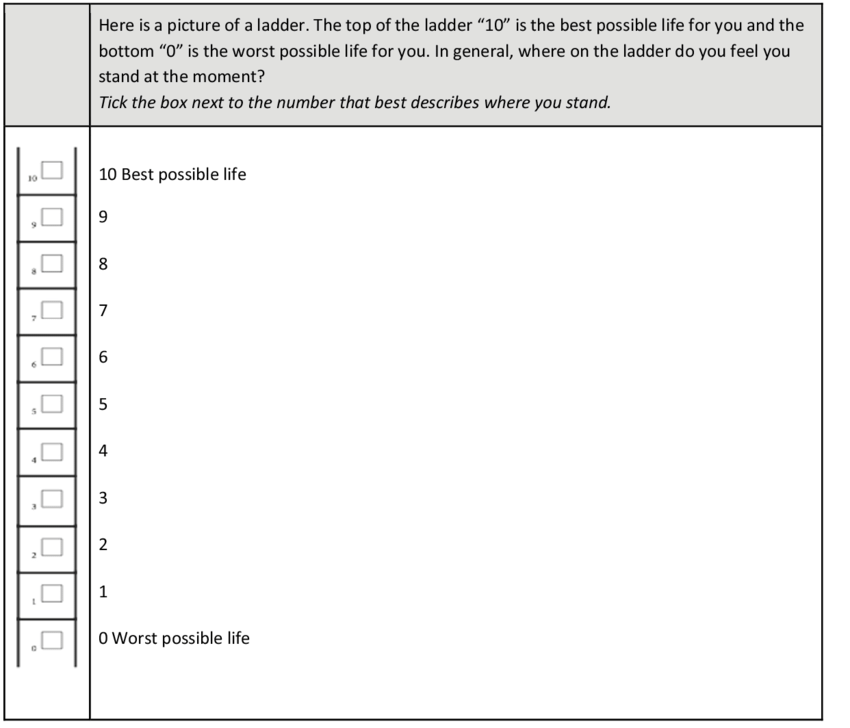

In [ ]:
import plotly.express as px
df = orig_df.copy(deep=True).reset_index()
df = df.sort_values(["Country name", "year"]).reset_index()
df = df.dropna(axis=1)
df = df.dropna(axis=1)
fig = px.line(df, x="year", y="ll", title="LL over time", hover_name="Country name", color="Country name", height=800, line_shape='spline')
fig.show()

# Section 2: Global Trends (3 minutes)

In [ ]:
import plotly.express as px
countries = ["Finland", "China", "Afghanistan", "Norway", "Japan", "Tanzania"]
df = orig_df.copy(deep=True).reset_index()
df = df[df["Country name"].isin(countries)]
df = df.sort_values(["Country name", "year"]).reset_index()
df = df.dropna(axis=1)
fig = px.line(df, x="year", y="ll", title="LL over time", hover_name="Country name", color="Country name", height=800, line_shape='spline')
fig.show()

In [ ]:
df = orig_df.copy()
df = df.sort_values("ll")
df.drop_duplicates(subset="Country name", inplace=True)
fig = px.scatter(df, x="Log GDP per capita", y="ll", trendline="ols", hover_name="Country name")
fig.show()

In [ ]:
df = orig_df.copy(deep=True)
fig = px.box(df, y="ll", x="year", points="all", hover_name="Country name", height=800)
fig.show()

In [ ]:
averaged_LL = df.groupby('year')['ll'].median().reset_index()
px.line(averaged_LL, y="ll", x="year")

In [ ]:
averaged_LL = df.groupby('year')['ll'].mean().reset_index()
px.line(averaged_LL, y="ll", x="year")

# Key factors

### The other columns
* GDP per capita - 
* Social support - is the national
average of the binary responses (either 0 or 1) to the GWP question “If you
were in trouble, do you have relatives or friends you can count on to help you
whenever you need them, or not?”
* Healthy life exp at birth - Healthy Life Expectancy (HLE). Healthy life expectancies at birth are based
on the data extracted from the World Health Organization’s (WHO) Global
Health Observatory data repository (Last updated: 2020-12-04). The data at
the source are available for the years 2000, 2010, 2015 and 2019. To match this
report’s sample period, interpolation and extrapolation are used.
* Freedom to make life choices - the national average of responses to the GWP
question “Are you satisfied or dissatisfied with your freedom to choose what
you do with your life?”
* Generosity - the residual of regressing national average of response to the GWP
question “Have you donated money to a charity in the past month?” on GDP
per capita.
* Perceptions of corruption - The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout
the government or not” and “Is corruption widespread within businesses or
not?” The overall perception is just the average of the two 0-or-1 responses. In
case the perception of government corruption is missing, we use the perception
of business corruption as the overall perception. The corruption perception at
the national level is just the average response of the overall perception at the
individual level.
* Positive affect -  defined as the average of three positive affect measures in GWP:
laugh, enjoyment and doing interesting things in the Gallup World Poll. These
measures are the responses to the following three questions, respectively: “Did
you smile or laugh a lot yesterday?”, and “Did you experience the following
feelings during A LOT OF THE DAY yesterday? How about Enjoyment?”,
“Did you learn or do something interesting yesterday?”
* Negative affect - defined as the average of three negative affect measures in
GWP. They are worry, sadness and anger, respectively the responses to “Did
you experience the following feelings during A LOT OF THE DAY yesterday?
How about Worry?”, “Did you experience the following feelings during A LOT
OF THE DAY yesterday? How about Sadness?”, and “Did you experience the
following feelings during A LOT OF THE DAY yesterday? How about Anger?”

# Section 3: Happiness in Context (2 minutes)

Introduce the "happiness paradox": some wealthier countries have lower happiness scores. Why? Consider cultural expectations and social inequality.

Compare a high-ranking country like Finland with a lower-ranking one that has a similar GDP but lacks a focus on welfare.

Discuss how societal trust and mental health have emerged as crucial factors for happiness in recent years.


In [ ]:
df = orig_df.copy(deep=True)
fig = px.imshow(df.iloc[:,2:].corr(), height=800, width=800, color_continuous_scale="RdYlBu")
fig.show()

In [ ]:
df = orig_df.copy(deep=True)
df = df[df["year"] == 2023]
fig = px.imshow(df.iloc[:,2:].corr(), height=800, width=800, color_continuous_scale="RdYlBu")
fig.show()
# TODO: lage trekant

In [ ]:
df = orig_df.copy()
g = sns.pairplot(df, dropna=True, corner=True, kind="reg")
g.map_lower(sns.kdeplot, levels=4, color=".1")

In [ ]:
sns.pairplot(df, hue="ll", corner=True, dropna=True)

* First off, there is something happening in the beginning here. * Not that many countries.

* There _might_ be a significant positive trend.
* No outliers except in the most 5 recent years.

These are all interesting findings. We'll figure some of them out further down. First I just want to look some more at the extremes of our LL column.

In [ ]:
df.nlargest(10, columns="ll")

In [ ]:
df.nsmallest(10, columns="ll")

In [ ]:
ax = df["ll"].plot.hist(bins=50, density=True)
df['ll'].plot.density(ax=ax)
ax.set_xlabel("LL")

I find it interesting that our LL column is bimodal. This can be checked further with a test.

In [ ]:
df.mode(axis=1)

Next, we can look at correlations between cols. I'm guessing theres going to be a lot of correlation, especially with things like GDP.

Now this is interesting!
We see some obvious points here:
* _LL_ does not correlate much with year.
* Cols regarding social status/welfare correlate with eachother, and with LL
* Negative correlation with corruption and negative affect

To further guide our RQ about correlations, we can pairplot all cols and look for obvious or interesting relationships.

Lets calculate some sample statistics

In [ ]:
column = "ll"
sample_data = pd.DataFrame({
    "type": column,
    column: orig_df[column].sample(orig_df.shape[0])
})
sample_data_mean_05 = pd.DataFrame({
    "type": "mean_of_5",
    column: [orig_df[column].sample(5).mean() for _ in range(1000)],
})
sample_data_mean_100 = pd.DataFrame({
    "type": "mean_of_100",
    column: [orig_df[column].sample(100).mean() for _ in range(1000)],
})
result = pd.concat([sample_data, sample_data_mean_05, sample_data_mean_100])

In [ ]:
g = sns.FacetGrid(result, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, column, range=[0, 10], bins=40)
g.set_axis_labels(column, 'Count')
plt.tight_layout()
plt.show()

In [ ]:
"""import umap
import umap.plot
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = continent_df.copy(deep=True)
data["Country name"] = data["continent"]
data = data.dropna()
cols = list(data.columns)
cols.insert(0, cols.pop(-1))
data = data[cols]
data = pd.concat([data,orig_df])
data
# reducer = umap.UMAP(n_neighbors=3)
# data = data[data.columns[1:-1]].values
# scaled_data = StandardScaler().fit_transform(data)
# embedding = reducer.fit(scaled_data)

# import umap.plot

# umap.plot.points(embedding)

# #umap.plot.points(scaled_penguin_data, labels=data["Country name"])
"""

Ideas:
Make avg based on each continent
umap those for each year
make gif

split it up
make gifs for those as well perhaps?

In [ ]:
df.head()

In [ ]:
orig_df["Country name"].unique()

In [ ]:
df = orig_df.copy(deep=True)
df = df.sort_values("year")
df = df[["Log GDP per capita", "ll", "year", "Country name"]]
df = df.dropna()
import plotly.express as px
px.scatter(df, x="Log GDP per capita", y="ll", animation_frame="year", animation_group="Country name",
           size="ll", color="Country name", hover_name="Country name", width=800, height=800, range_y=[0, 10], range_x=[4, 12])

In [ ]:
import plotly.express as px
df = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     projection="natural earth")
fig.show()

# Section 4: Insights from the Data (2 minutes)

Highlight practical insights that can be drawn from the WHR:

For individuals: meaningful connections and community involvement are key to happiness.

For policymakers: societal well-being is best enhanced by promoting social equality, welfare, and community trust.

Explain how data science can guide decision-making: policies informed by WHR data can improve quality of life in cities and communities.



# Conclusion (1 minute)

Conclude by emphasizing the importance of considering happiness as a holistic measure of progress.

Summarize the key points discussed and reiterate the value of using data to understand and improve happiness.

Optional Interaction

If time permits, ask the audience a quick question like, "Which metric do you think is most important for happiness?" to end on an interactive note.

In [ ]:
data = df
data = data.dropna()

In [ ]:
columns = list(df.columns)
columns.remove("ll")
columns.remove("Country name")
columns

In [ ]:
X, y = data.loc[:, ~data.columns.isin(['ll', "Country name"])], data["ll"]

In [ ]:
model.fit(X, y)
print(model.score(X,y))

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))
print(results.summary())


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, svd_solver = 'full')
X_pca = pca.fit_transform(X)
results = sm.OLS(y, X_pca).fit()
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))
print(results.summary())